In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('/config/workspace/notebooks/data/concrete_data.csv')

In [20]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [22]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [23]:
df[df.isnull()].sum()

cement                           0.0
blast_furnace_slag               0.0
fly_ash                          0.0
water                            0.0
superplasticizer                 0.0
coarse_aggregate                 0.0
fine_aggregate                   0.0
age                              0.0
concrete_compressive_strength    0.0
dtype: float64

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

In [26]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')


In [27]:
df=df.drop_duplicates()

<Axes: >

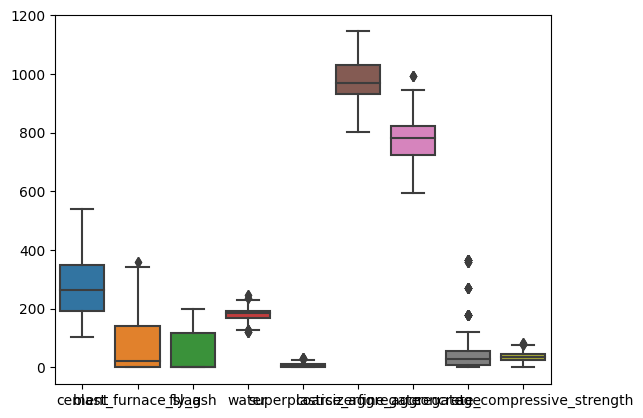

In [28]:
sns.boxplot(df)

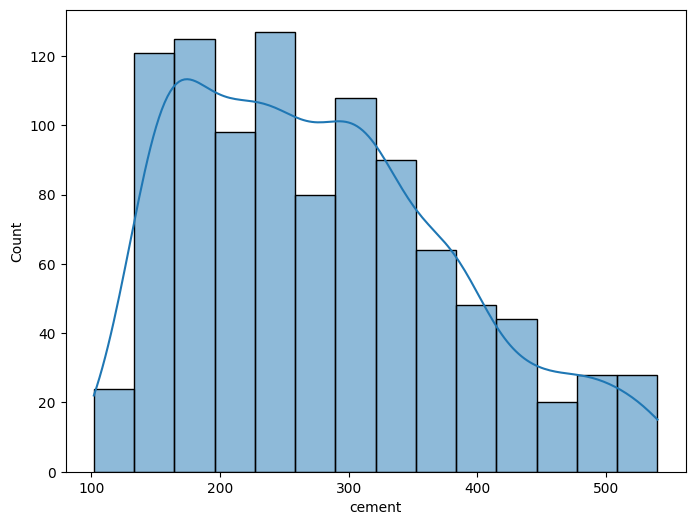

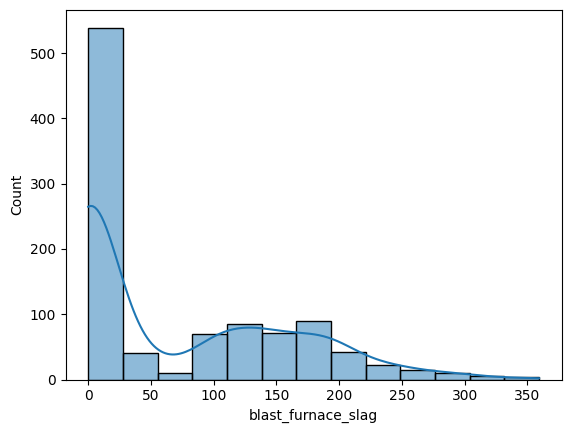

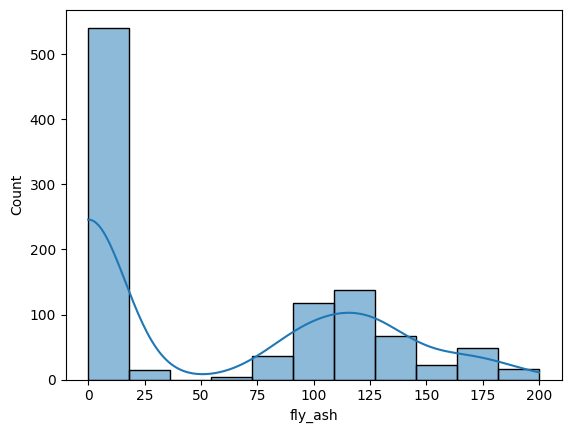

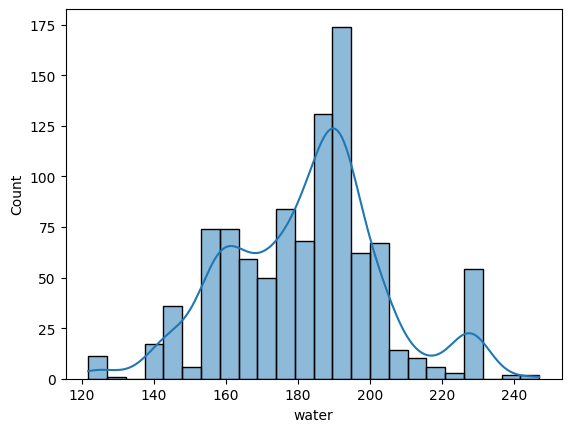

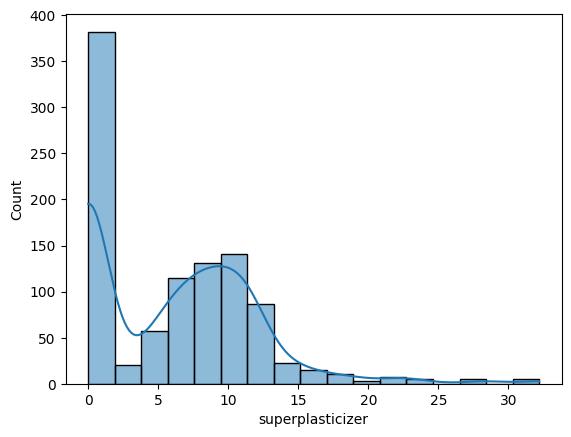

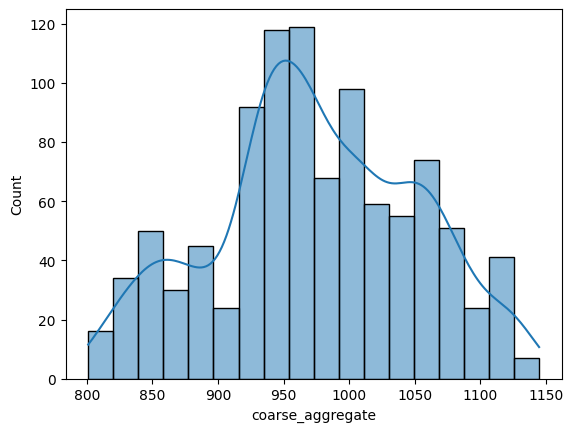

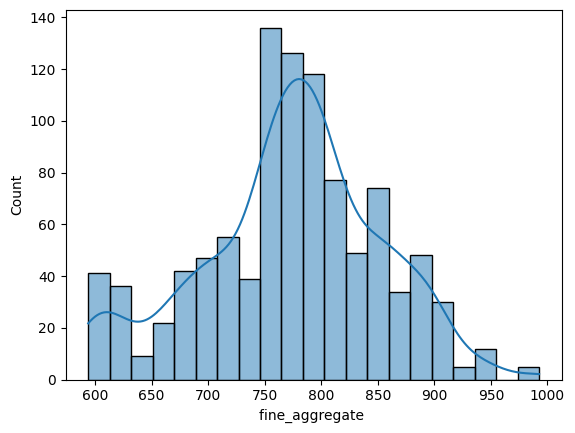

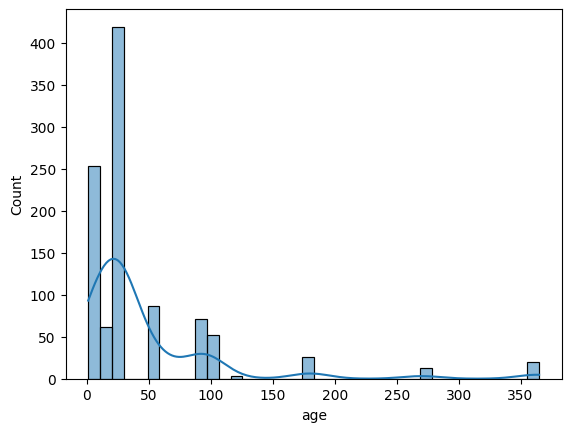

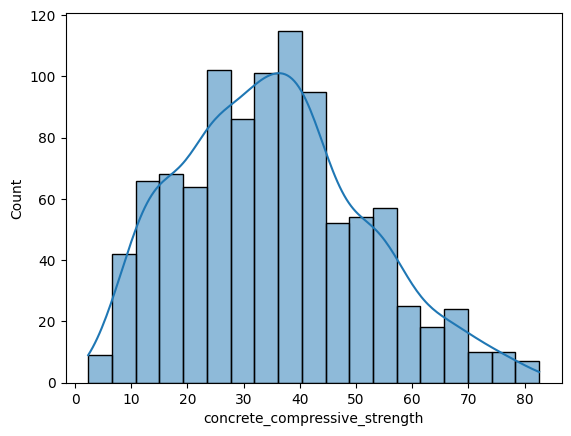

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar=StandardScaler()
X=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
X_train=scalar.fit_transform(X_train)

In [34]:
from sklearn.svm import SVR

In [35]:
model=SVR()

In [36]:
model.fit(X_train,y_train)

SVR()

In [37]:
y_pred=model.predict(X_test)

/config/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mean_squared_error(y_pred,y_test)
r2_score(y_pred,y_test)

-5.775318155693766e+30

In [40]:
mean_absolute_error(y_test,y_pred)

13.951566703108906

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtr=DecisionTreeRegressor()

In [43]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
y_pred=dtr.predict(X_test)

/config/.local/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [45]:

mean_absolute_error(y_test,y_pred)

25.329047619047618